In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

sns.set_theme(style="darkgrid")

In [44]:
path = '../measurements'
all_files = glob.glob(path + "/*.csv")

fifoname, lbqname, scqname = 'FIFO', 'LockBased', 'SCQ'

df = pd.DataFrame()

fifo = pd.DataFrame()
lbq = pd.DataFrame()
scq = pd.DataFrame()

for f in all_files:
    
    df1 = pd.read_csv(f, sep=";")

    if fifoname in f:
        fifo = fifo.append(df1)
    elif lbqname in f:
        lbq = lbq.append(df1)
    
    df = df.append(df1)
    #display(df)
    #print()
#display(df)
#display(fifo)

In [36]:
#plt.plot(df["enqueue rate"]) # just an example

<AxesSubplot:title={'center':'total enqueue time'}, xlabel='thread count', ylabel='total enqueue time'>

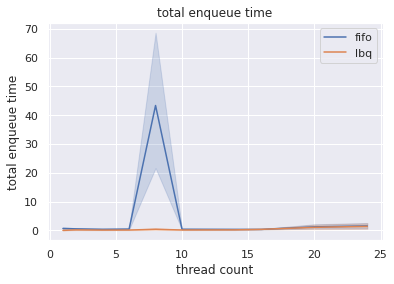

In [62]:
# Plot the responses for different events and regions
sns.lineplot(x="thread count", y="total enqueue time", label="fifo", data=fifo).set_title("total enqueue time")
sns.lineplot(x="thread count", y="total enqueue time", label="lbq", data=lbq)


<AxesSubplot:title={'center':'total dequeue time'}, xlabel='thread count', ylabel='total dequeue time'>

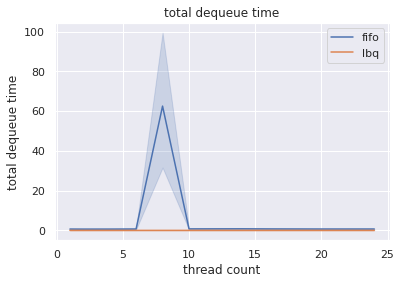

In [63]:
#sns.lineplot(x="thread count", y="total dequeue time", data=df)
sns.lineplot(x="thread count", y="total dequeue time", label="fifo", data=fifo).set_title("total dequeue time")
sns.lineplot(x="thread count", y="total dequeue time", label="lbq", data=lbq)

<AxesSubplot:title={'center':'enqueue rate'}, xlabel='thread count', ylabel='enqueue rate'>

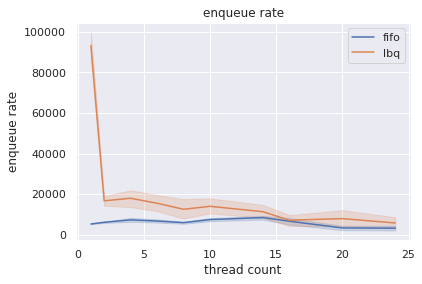

In [64]:
#sns.lineplot(x="thread count", y="enqueue rate", data=df)
sns.lineplot(x="thread count", y="enqueue rate", label="fifo", data=fifo).set_title("enqueue rate")
sns.lineplot(x="thread count", y="enqueue rate", label="lbq", data=lbq)

<AxesSubplot:title={'center':'dequeue rate'}, xlabel='thread count', ylabel='dequeue rate'>

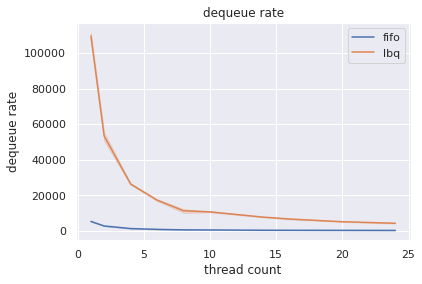

In [65]:
#sns.lineplot(x="thread count", y="dequeue rate", data=df)
sns.lineplot(x="thread count", y="dequeue rate", label="fifo", data=fifo).set_title("dequeue rate")
sns.lineplot(x="thread count", y="dequeue rate", label="lbq", data=lbq)


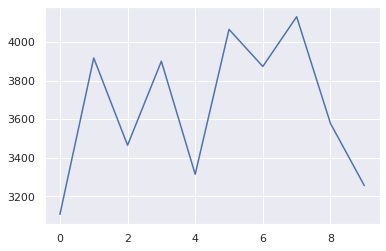

In [5]:
plt.plot(df["enqueue rate"]) # just an example
